In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data="customer.csv"
df=pd.read_csv(data)

In [3]:
df.columns=df.columns.str.lower().str.replace(" ","_")

categorical_columns=list(df.dtypes[df.dtypes=="object"].index)

for c in categorical_columns: 
    df[c]=df[c] .str.lower().str.replace(" ","_")

In [4]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges=df.totalcharges.fillna(0)
df.churn=(df.churn =="yes").astype(int)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [7]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [8]:
y_full_train=df_full_train.churn.values
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

In [9]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

In [10]:
numerical =['tenure','monthlycharges', 'totalcharges']
categorical =['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 
            'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod']

In [ ]:
train_dicts=df_train[categorical + numerical].to_dict(orient="records")  #corpus_train to dictionary
dv=DictVectorizer(sparse=False) # create a vertorizer
X_train=dv.fit_transform(train_dicts)   # Fit a vectorizer to dict_corpus_train
val_dicts=df_val[categorical + numerical].to_dict(orient="records") #corpus_test to dictionary
X_val=dv.transform(val_dicts) # transform dict_corpus_test

In [12]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [13]:
y_pred=model.predict_proba(X_val)[:,1]
churn_decision=(y_pred >= 0.5)

## ACCURACCY AND DUMMY MODEL

In [14]:
lon=len(y_val)
lon

1409

In [15]:
(churn_decision==y_val).sum()

np.int64(1132)

In [16]:
1132/1409

0.8034066713981547

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_val,y_pred>=0.5)

0.8034066713981547

In [19]:
thresholds=np.linspace(0,1,50)

scores=[]

for i in thresholds:
    score=accuracy_score(y_val,y_pred>=i)
    print("threshold %.3f : accuracy%.3f" % (i,score))
    scores.append(score) 

threshold 0.000 : accuracy0.274
threshold 0.020 : accuracy0.430
threshold 0.041 : accuracy0.496
threshold 0.061 : accuracy0.532
threshold 0.082 : accuracy0.574
threshold 0.102 : accuracy0.611
threshold 0.122 : accuracy0.631
threshold 0.143 : accuracy0.659
threshold 0.163 : accuracy0.671
threshold 0.184 : accuracy0.694
threshold 0.204 : accuracy0.705
threshold 0.224 : accuracy0.724
threshold 0.245 : accuracy0.735
threshold 0.265 : accuracy0.749
threshold 0.286 : accuracy0.754
threshold 0.306 : accuracy0.761
threshold 0.327 : accuracy0.761
threshold 0.347 : accuracy0.764
threshold 0.367 : accuracy0.771
threshold 0.388 : accuracy0.779
threshold 0.408 : accuracy0.786
threshold 0.429 : accuracy0.791
threshold 0.449 : accuracy0.792
threshold 0.469 : accuracy0.794
threshold 0.490 : accuracy0.801
threshold 0.510 : accuracy0.807
threshold 0.531 : accuracy0.806
threshold 0.551 : accuracy0.803
threshold 0.571 : accuracy0.806
threshold 0.592 : accuracy0.803
threshold 0.612 : accuracy0.795
threshol

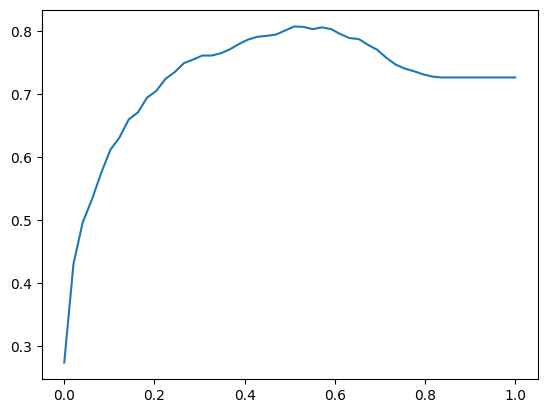

In [20]:
plt.plot(thresholds,scores)

In [21]:
from collections import Counter

In [22]:
Counter(y_pred>=1.0)

Counter({np.False_: 1409})

In [23]:
1-y_val.mean()

np.float64(0.7260468417317246)

## CONFUSE TABLE 

In [24]:
actual_positive= (y_val==1)
actual_negative= (y_val==0)

In [25]:
t=0.5
pred_positive= (y_pred>=t)
pred_negative= (y_pred<t)

In [26]:
tp= (actual_positive & pred_positive).sum()
tn= (actual_negative & pred_negative).sum()

In [27]:
fp= (actual_negative & pred_positive).sum()
fn= (actual_positive & pred_negative).sum()

In [28]:
tp,tn,fp,fn

(np.int64(212), np.int64(920), np.int64(103), np.int64(174))

In [29]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])

confusion_matrix/confusion_matrix.sum()

array([[0.65294535, 0.07310149],
       [0.12349184, 0.15046132]])

## PRECISION AND RECALL

In [30]:
(tp+tn)/(tp+tn+fp+fn)

np.float64(0.8034066713981547)

In [31]:
p=tp/(tp+fp)
p

np.float64(0.6730158730158731)

In [32]:
r=tp/(tp+fn)
r

np.float64(0.5492227979274611)

## ROC CURVES

### TPR and FRP

In [33]:
tpr=tp /(tp + fn)

In [34]:
frp= fp /(tn+fp)

In [35]:
tpr,frp

(np.float64(0.5492227979274611), np.float64(0.10068426197458455))

In [36]:
scores=[]
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive= (y_val==1)
    actual_negative= (y_val==0)

    pred_positive= (y_pred>=t)
    pred_negative= (y_pred<t)

    tp= (actual_positive & pred_positive).sum()
    tn= (actual_negative & pred_negative).sum()

    fp= (actual_negative & pred_positive).sum()
    fn= (actual_positive & pred_negative).sum()

    scores.append((t,tp,tn,fp,fn))

In [37]:
columns= ["t","tp","tn","fp","fn"]
df_scores=pd.DataFrame(scores, columns=columns)
df_scores["tpr"]=df_scores["tp"]/(df_scores["tp"]+df_scores["fn"])
df_scores["fpr"]=df_scores["fp"]/(df_scores["fp"]+df_scores["tn"])
df_scores

,t,tp,tn,fp,fn,tpr,fpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,385,129,894,1,0.997409,0.873900
2,0.02,383,219,804,3,0.992228,0.785924
3,0.03,382,274,749,4,0.989637,0.732160
4,0.04,382,314,709,4,0.989637,0.693060
...,...,...,...,...,...,...,...
96,0.96,0,1023,0,386,0.000000,0.000000
97,0.97,0,1023,0,386,0.000000,0.000000
98,0.98,0,1023,0,386,0.000000,0.000000
99,0.99,0,1023,0,386,0.000000,0.000000


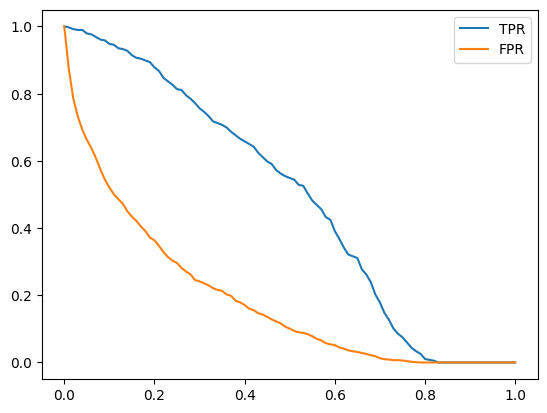

In [38]:
plt.plot(df_scores.t,df_scores.tpr,label="TPR")
plt.plot(df_scores.t,df_scores.fpr,label="FPR")
plt.legend()

In [39]:
def tpr_fpr_df(y_val,y_pred):
    scores=[]
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive= (y_val==1)
        actual_negative= (y_val==0)

        pred_positive= (y_pred>=t)
        pred_negative= (y_pred<t)

        tp= (actual_positive & pred_positive).sum()
        tn= (actual_negative & pred_negative).sum()

        fp= (actual_negative & pred_positive).sum()
        fn= (actual_positive & pred_negative).sum()

        scores.append((t,tp,tn,fp,fn))
    columns= ["t","tp","tn","fp","fn"]
    df_scores=pd.DataFrame(scores, columns=columns)
    df_scores["tpr"]=df_scores["tp"]/(df_scores["tp"]+df_scores["fn"])
    df_scores["fpr"]=df_scores["fp"]/(df_scores["fp"]+df_scores["tn"])
    return df_scores    

### RANDOM MODEL 

In [40]:
np.random.seed(3)
y_rand=np.random.uniform(0,1,size=len(y_val))

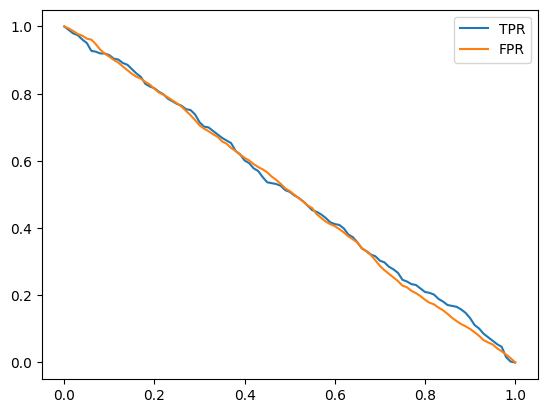

In [41]:
df_scores_rand=tpr_fpr_df(y_val,y_rand)
plt.plot(df_scores_rand.t,df_scores_rand.tpr,label="TPR")
plt.plot(df_scores_rand.t,df_scores_rand.fpr,label="FPR")
plt.legend()

### IDEAL MODEL

In [42]:
n_nega= (y_val==0).sum()
n_posi=(y_val==1).sum()
n_nega, n_posi

(np.int64(1023), np.int64(386))

In [43]:
(y_val==0).mean()

np.float64(0.7260468417317246)

In [44]:
y_ideal=np.repeat([0,1],[n_nega,n_posi])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [45]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [46]:
accuracy_score(y_ideal,y_ideal_pred>=0.726)

1.0

In [47]:
df_scores_ideal=tpr_fpr_df(y_ideal,y_ideal_pred)
df_scores_ideal

,t,tp,tn,fp,fn,tpr,fpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,386,15,1008,0,1.000000,0.985337
2,0.02,386,29,994,0,1.000000,0.971652
3,0.03,386,43,980,0,1.000000,0.957967
4,0.04,386,57,966,0,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,1023,0,329,0.147668,0.000000
97,0.97,43,1023,0,343,0.111399,0.000000
98,0.98,29,1023,0,357,0.075130,0.000000
99,0.99,15,1023,0,371,0.038860,0.000000


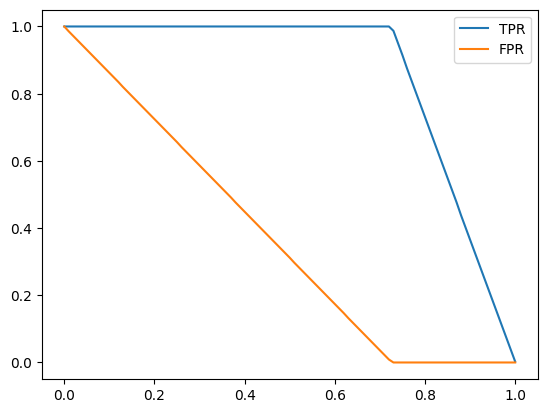

In [48]:
plt.plot(df_scores_ideal.t,df_scores_ideal.tpr,label="TPR")
plt.plot(df_scores_ideal.t,df_scores_ideal.fpr,label="FPR")
plt.legend()

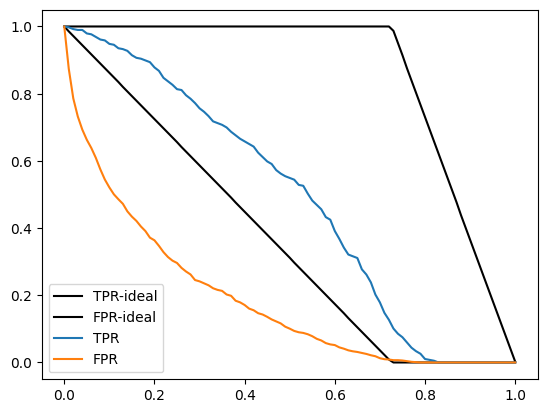

In [49]:
plt.plot(df_scores_ideal.t,df_scores_ideal.tpr,label="TPR-ideal",color="black")
plt.plot(df_scores_ideal.t,df_scores_ideal.fpr,label="FPR-ideal",color="black")

plt.plot(df_scores.t,df_scores.tpr,label="TPR")
plt.plot(df_scores.t,df_scores.fpr,label="FPR")
plt.legend()

plt.legend()

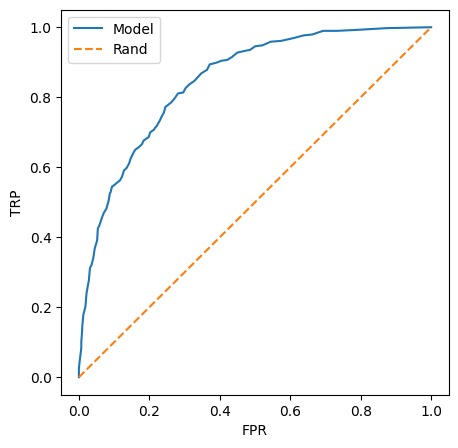

In [50]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr,df_scores.tpr,label="Model")
plt.plot([0,1],[0,1],label="Rand",linestyle="--")

plt.xlabel("FPR")
plt.ylabel("TRP")

plt.legend()

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

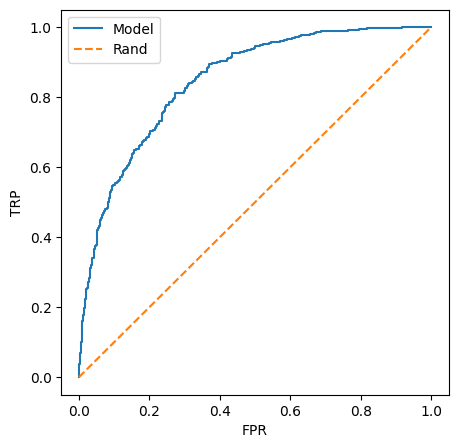

In [53]:
plt.figure(figsize=(5,5))

plt.plot(fpr,tpr,label="Model")
plt.plot([0,1],[0,1],label="Rand",linestyle="--")

plt.xlabel("FPR")
plt.ylabel("TRP")

plt.legend()

## ROC AUC

In [54]:
from sklearn.metrics import auc 

In [55]:
auc(fpr,tpr)

0.8463120254863528

In [56]:
auc(df_scores.fpr,df_scores.tpr)

0.8459194991870908

In [57]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr,tpr)

0.8463120254863528

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_val,y_pred)

0.8463120254863528

In [60]:
negatives=y_pred[y_val==0]
positives=y_pred[y_val==1]
negatives

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.08290035, 0.29130676,
       0.15149644], shape=(1023,))

In [61]:
n=50000

np.random.seed(2)
id_nega=np.random.randint(0,len(negatives),size=n)
id_posi=np.random.randint(0,len(positives),size=n)

(negatives[id_nega] < positives[id_posi]).mean()

np.float64(0.84882)

## CROSS VALIDATION

In [76]:
def training(df_train,y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient="records")

    dv=DictVectorizer(sparse=False)
    X_train=dv.fit_transform(dicts)

    model=LogisticRegression(C=C,max_iter=10000)
    model.fit(X_train,y_train)

    return dv,model

In [77]:
dv,model = training(df_train,y_train,C=0.001)

In [78]:
def predict(df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient="records")
    X=dv.transform(dicts)

    y_pred=model.predict_proba(X)[:,1]


    return y_pred

In [79]:
y_pred=predict(df_val,dv,model)
y_pred

array([0.11212133, 0.10917325, 0.21558443, ..., 0.33333969, 0.03332506,
       0.50499283], shape=(1126,))

In [73]:
from sklearn.model_selection import KFold 

In [74]:
from tqdm.auto import tqdm

/home/yogo/Documents/spaceDev/codeLab/machine_learning/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [85]:
n_splits=5

for C in tqdm([0.001, 0.01, 0.1, 1]):
    kfold= KFold(n_splits=n_splits,shuffle=True,random_state=2)
    scores = []
    
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = training(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))    

 25%|██▌       | 1/4 [00:11<00:35, 11.74s/it]

C=0.001 0.826 +- 0.009


 50%|█████     | 2/4 [00:40<00:43, 21.98s/it]

C=0.01 0.840 +- 0.012


 75%|███████▌  | 3/4 [01:50<00:43, 43.58s/it]

C=0.1 0.843 +- 0.014


100%|██████████| 4/4 [02:31<00:00, 37.93s/it]

C=1 0.843 +- 0.014


In [86]:
scores

[0.8547032386197293,
 0.8531411167193914,
 0.8169306731156791,
 0.8418342364037728,
 0.8487122938268896]

In [88]:
dv, model = training(df_full_train, df_full_train.churn.values, C=0.01)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8548119319228228